In [1]:
# Dependencies
import time
import tweepy
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from myKeys import (
    TWITTER_CONSUMER_KEY,
    TWITTER_CONSUMER_SECRET,
    TWITTER_ACCESS_TOKEN,
    TWITTER_TOKEN_SECRET
)

auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_TOKEN_SECRET)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
def get_sentiments(target):
    #target = "@DalaiLama"
    sentiment_list = []

    # Run search around each tweet
    for x in range(5):

        public_tweets = api.user_timeline(target, count=100, page=x)

        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            # YOUR CODE HERE
            results = analyzer.polarity_scores(tweet['text'])

            # Create a dictionary of the Average Sentiments
            # This allows checking for duplicate tweets
            sentiment = {
                "User": target,
                "Date": datetime.strptime(tweet['created_at'], "%a %b %d %H:%M:%S %z %Y"),
                "Compound": results['compound']
            }
            sentiment_list.append(sentiment)

        # Print the Sentiments
    sentiments_df = pd.DataFrame(sentiment_list)
    
    sentiments_df = sentiments_df[['User','Date','Compound']]
    fig = plt.figure()
    plt.figure(figsize=(12,6))
    
    plt.hlines(sentiments_df['Compound'].median(), sentiments_df['Date'].min(), sentiments_df['Date'].max(), 'r')
    
    #sentiments_df.plot('Date', 'Compound', marker='o')
    plt.plot(sentiments_df['Date'],sentiments_df['Compound'], marker='o')
    plt.savefig('Sentiments.png')
    #plt.xlabel('CoasterRuntime')
    #plt.ylabel('Speed(MPH)')
    
    #plt.title = 'Sentiment Analysis of Tweets' + str(datetime.now())
    #plt.show()

In [3]:
#public_tweets = api.search("@PlotBot5 analyze:")
#pprint(public_tweets)

In [4]:
def get_mentions():
    mentions = []
    try:
        public_tweets = api.search("@PlotBot5 analyze:")
        for tweet in public_tweets['statuses']:
            text = tweet['text']
            search_id = tweet['id']
            to_analyze = (text.split(':')[1]).strip()
            requestor = tweet['user']['screen_name']
            request_dict = {
                'id': search_id,
                'to_analyze' : to_analyze,
                'requestor': requestor
            }
            mentions.append(request_dict)
    except:
        print('nothing to do')
    return mentions    
        

In [5]:
already_searched = []

KeyboardInterrupt: 

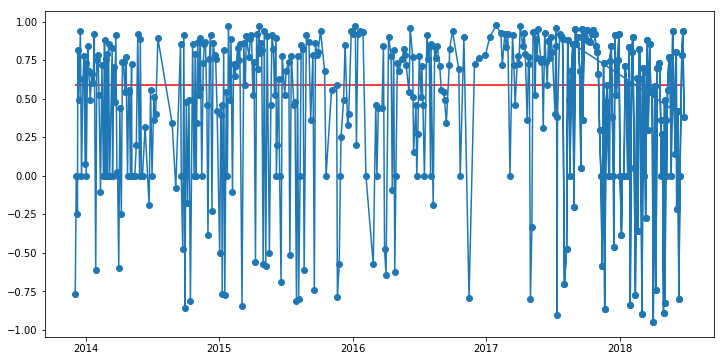

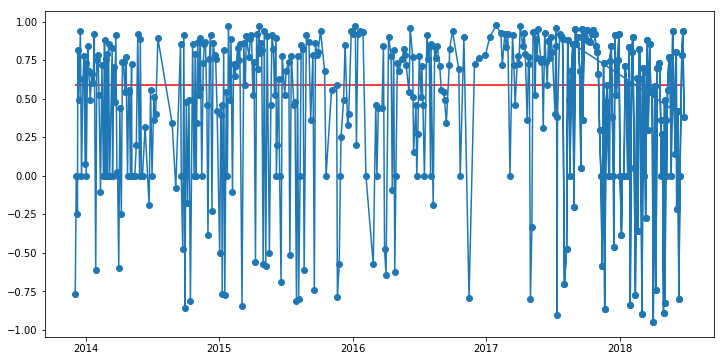

In [6]:
while True:
    users = get_mentions()
    
    for user in users:
        while user not in already_searched:
            already_searched.append(user)
            get_sentiments(user['to_analyze'])
            #print(already_searched)
            api.update_with_media("Sentiments.png", "@"+user['requestor'])
            
    time.sleep(3600)